# CHAPTER 15 자연어 기본

## 01 자연어 기본 처리

In [1]:
import warnings  # 경고메시지를 제어하는 모듈 사용
warnings.filterwarnings(action='ignore')  # 경고메시지가 출력되지 않도록 처리

In [2]:
!pip install konlpy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import konlpy as ko  # 한국어 자연어 처리하는 모듈 사용

In [4]:
from konlpy.corpus import kolaw, kobill  #한국어 코퍼스 내의 문장 사용

In [5]:
kolaw.fileids()   #헌법에 대한 텍스트 파일 확인

['constitution.txt']

In [6]:
kobill.fileids()  # 일반 법률에 대한 텍스트 파일 확인

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [7]:
c=kolaw.open('constitution.txt').read()  # 헌법 문서를 읽어온다

In [8]:
con=c.split('\n\n')  # 내부의 문장을 분리해서 리스트로 보관

In [9]:
con[0]  # 첫 번째 리스트 원소를 확인하면 헌번 제목이 나온다

'대한민국헌법'

In [14]:
con_sen=con[1]  # 실제 헌법의 전문을 가져온다

In [11]:
!pip install jpype1

Defaulting to user installation because normal site-packages is not writeable


In [12]:
from konlpy.tag import Kkma  # 형태소를 분리하는 모듈 사용
kkma=Kkma()  # 형태소 객체 생성

In [15]:
con_sen_n=kkma.nouns(con_sen)  # 명사를 기준으로 분리
con_sen_n[:10]

['유구', '역사', '전통', '우리', '국민', '3', '1', '1운동', '운동', '건립']

In [16]:
con_sen_m=kkma.morphs(con_sen)  # 한글을 형태소별로 분리
con_sen_m[:10]

['유구', '하', 'ㄴ', '역사', '와', '전통', '에', '빛나', '는', '우리']

In [17]:
con_sen_p=kkma.pos(con_sen)  # 부리된 형태소의 품사 표시
con_sen_p[:10]

[('유구', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKM'),
 ('빛나', 'VV'),
 ('는', 'ETD'),
 ('우리', 'NNM')]

In [18]:
from konlpy.tag import Hannanum  # 다른 형태소 분석하는 클래스 사용
hannanum=Hannanum()  # 형태소 분리를 위한 객체 사용

In [19]:
hannanum.nouns('이것은 형태소 분석기 입니다 아버지가 방에 들어가신다')

['이것', '형태소', '분석기', '아버지', '방']

In [20]:
hannanum.morphs('이것은 형태소 분석기 입니다 아버지가 방에 들어가신다')

['이것',
 '은',
 '형태소',
 '분석기',
 '일',
 'ㅂ니다',
 '아버지',
 '가',
 '방',
 '에',
 '들',
 '어',
 '가',
 '시ㄴ다']

In [21]:
hannanum.pos('이것은 형태소 분석기 입니다 아버지가 방에 들어가신다')

[('이것', 'N'),
 ('은', 'J'),
 ('형태소', 'N'),
 ('분석기', 'N'),
 ('일', 'P'),
 ('ㅂ니다', 'E'),
 ('아버지', 'N'),
 ('가', 'J'),
 ('방', 'N'),
 ('에', 'J'),
 ('들', 'P'),
 ('어', 'E'),
 ('가', 'P'),
 ('시ㄴ다', 'E')]

In [22]:
from konlpy.tag import Okt  # 다른 형태소들 클래스를 가져온다
okt=Okt()
okt.nouns('이것은 형태소 분석기 입니다 아버지가 방에 들어가신다')

['것', '형태소', '분석', '기', '아버지', '방']

In [23]:
okt.morphs('이것은 형태소 분석기 입니다 아버지가 방에 들어가신다')

['이', '것', '은', '형태소', '분석', '기', '입니다', '아버지', '가', '방', '에', '들어가신다']

In [24]:
okt.pos('이것은 형태소 분석기 입니다 아버지가 방에 들어가신다')

[('이', 'Determiner'),
 ('것', 'Noun'),
 ('은', 'Josa'),
 ('형태소', 'Noun'),
 ('분석', 'Noun'),
 ('기', 'Noun'),
 ('입니다', 'Adjective'),
 ('아버지', 'Noun'),
 ('가', 'Josa'),
 ('방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb')]

In [25]:
text='이것은 형태소 분석기 입니다 아버지가 방에 들어가신다'
print(okt.morphs(text))
print(okt.morphs(text, stem=True))

['이', '것', '은', '형태소', '분석', '기', '입니다', '아버지', '가', '방', '에', '들어가신다']
['이', '것', '은', '형태소', '분석', '기', '이다', '아버지', '가', '방', '에', '들어가다']


In [26]:
okt.phrases(text)

['이것', '형태소', '형태소 분석기', '아버지', '분석']

In [27]:
from konlpy.tag import Komoran
komoran=Komoran()
komoran.nouns('이것은 형태소 분석기 입니다 아버지가 방에 들어가신다')

['형태소', '분석기', '아버지', '방']

In [28]:
komoran.morphs('이것은 형태소 분석기 입니다 아버지가 방에 들어가신다')

['이것', '은', '형태소', '분석기', '이', 'ㅂ니다', '아버지', '가', '방', '에', '들어가', '시', 'ㄴ다']

In [29]:
komoran.pos('이것은 형태소 분석기 입니다 아버지가 방에 들어가신다')

[('이것', 'NP'),
 ('은', 'JX'),
 ('형태소', 'NNP'),
 ('분석기', 'NNG'),
 ('이', 'VV'),
 ('ㅂ니다', 'EC'),
 ('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('시', 'EP'),
 ('ㄴ다', 'EC')]

In [30]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [31]:
import pandas as pd
tagsets=pd.DataFrame()
N=67
tagsets["Hannanum-기호"]=list(hannanum.tagset.keys())+list("*"*(N-len(hannanum.tagset)))
tagsets["Hannanum-품사"]=list(hannanum.tagset.values())+list("*"*(N-len(hannanum.tagset)))
tagsets["Kkma-기호"]=list(kkma.tagset.keys())+list("*"*(N-len(kkma.tagset)))
tagsets["Kkma-품사"]=list(kkma.tagset.values())+list("*"*(N-len(kkma.tagset)))
tagsets["Komoran-기호"]=list(komoran.tagset.keys())+list("*"*(N-len(komoran.tagset)))
tagsets["Komoran-품사"]=list(komoran.tagset.values())+list("*"*(N-len(komoran.tagset)))
tagsets["OKT-기호"]=list(okt.tagset.keys())+list("*"*(N-len(okt.tagset)))
tagsets["OKT-품사"]=list(okt.tagset.values())+list("*"*(N-len(okt.tagset)))

In [32]:
tagsets.tail()

,Hannanum-기호,Hannanum-품사,Kkma-기호,Kkma-품사,Komoran-기호,Komoran-품사,OKT-기호,OKT-품사
62,*,*,XPV,용언 접두사,*,*,*,*
63,*,*,XR,어근,*,*,*,*
64,*,*,XSA,형용사 파생 접미사,*,*,*,*
65,*,*,XSN,명사파생 접미사,*,*,*,*
66,*,*,XSV,동사 파생 접미사,*,*,*,*


In [33]:
tagsets.head()

,Hannanum-기호,Hannanum-품사,Kkma-기호,Kkma-품사,Komoran-기호,Komoran-품사,OKT-기호,OKT-품사
0,E,어미,EC,연결 어미,EC,연결 어미,Adjective,형용사
1,EC,연결 어미,ECD,의존적 연결 어미,EF,종결 어미,Adverb,부사
2,EF,종결 어미,ECE,대등 연결 어미,EP,선어말어미,Alpha,알파벳
3,EP,선어말어미,ECS,보조적 연결 어미,ETM,관형형 전성 어미,Conjunction,접속사
4,ET,전성 어미,EF,종결 어미,ETN,명사형 전성 어미,Determiner,관형사


In [34]:
import sys
if sys.platform=='darwin':
    from konlpy.tag import Mecab
    mecab=Mecab()
    print(mecab.nouns('이것은 형태소 분석기 입니다 아버지가 방에 들어가신다'))
else:
    pass

In [35]:
import pprint
if sys.platform=='darwin':
    pprint.pprint(mecab.pos('이것은 형태소 분석기 입니다 아버지가 방에 들어가신다'))
else:
    pass

In [36]:
# !pip install eunjeon
from eunjeon import Mecab
tagger=Mecab()

ModuleNotFoundError: No module named 'eunjeon'

In [37]:
tagger.nouns('이것은 형태소 분석기 입니다 아버지가 방에 들어가신다')

NameError: name 'tagger' is not defined

In [38]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [39]:
import nltk
from konlpy.corpus import kobill
files_ko=kobill.fileids()
files_ko

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [40]:
doc_ko=kobill.open('1809898.txt').read()

In [41]:
t=Okt()
tokens_ko=t.nouns(doc_ko)
print(tokens_ko[:10])

['국군', '부대', '소말리아', '해역', '파견', '연장', '의안', '의안', '제출', '연월일']


In [42]:
ko_=nltk.Text(tokens_ko, name='국군부대의 소말리아 해역 파견연장 동의안')
ko_

<Text: 국군부대의 소말리아 해역 파견연장 동의안>

In [43]:
len(ko_.tokens)

640

In [44]:
len(set(ko_.tokens))

249

In [45]:
ko_.tokens[:10]

['국군', '부대', '소말리아', '해역', '파견', '연장', '의안', '의안', '제출', '연월일']

In [46]:
ko_.vocab()

FreqDist({'파견': 31, '부대': 24, '소말리아': 18, '연장': 14, '국군': 13, '해역': 12, '의안': 11, '우리': 9, '유엔': 9, '척': 9, ...})

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import platform

from matplotlib import font_manager, rc

if sys.platform == 'darwin':
    path='/Librar/Fonts/AppleGothic.ttf'
elif platform.system() == 'Windows':
    path='c:/Windows/Fonts/malgun.ttf'
else:
    print('Unkonwn system... sorry~~~~')

foot_name=font_manager.FontProperties(fname=path).get_name()
rc('font', family=foot_name)

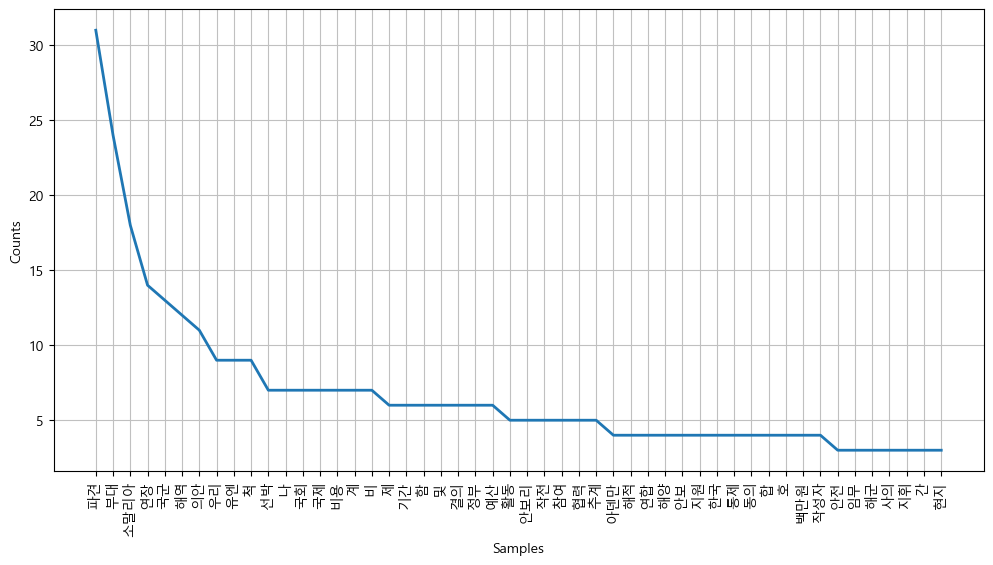

<Axes: xlabel='Samples', ylabel='Counts'>

In [48]:
plt.figure(figsize=(12,6))
ko_.plot(50)

In [49]:
ko_.count('파견')

31

In [50]:
ko_.count('소말리아')

18

<Figure size 1200x600 with 0 Axes>

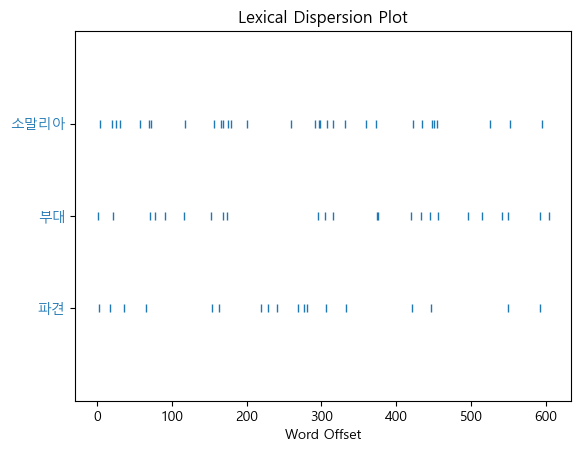

In [51]:
plt.figure(figsize=(12,6))
ko_.dispersion_plot(['파견','부대','소말리아'])

In [52]:
ko_.concordance('소말리아')  # 특정 단어가 있는 곳은 단어 확인

Displaying 18 of 18 matches:
국군 부대 소말리아 해역 파견 연장 의안 의안 제출 연월일 번호 제 자 정 부 제안 
 파견 연장 의안 의안 제출 연월일 번호 제 자 정 부 제안 이유 소말리아 아덴만 해역 파견 국군 부대 청해부대 의 파견 기간 종료 예정 다
부대 의 파견 기간 종료 예정 다음 이유 파견 기간 연장 함 첫째 소말리아 해적 활동 우리 선박 안전 위협 둘째 청해부대 성공 임무 수행 우
여 국내외 관계 기관 파견 연장 요청 내용 유엔 안보리 결의 근거 소말리아 아덴만 해역 파견 국군 부대 파견 기간 장함 나 국군 부대 임무 
심의 과정 반영 추진 합 의 기획재정부 외교통상부 합의 국군 부대 소말리아 해역 파견 연장 의안 헌법 제 항의 규정 소말리아 아덴만 해역 파
합의 국군 부대 소말리아 해역 파견 연장 의안 헌법 제 항의 규정 소말리아 아덴만 해역 파견 국군 부대 파견 기간 연장 동의 국군 부대 파견
 방지 및 지원 차단 위 협력 국 협력 촉구 유엔 안보리 결의 호 소말리아 과도정부 출범 이후 무 정부 상태 지속 부터 소말리아 해역 해적 
리 결의 호 소말리아 과도정부 출범 이후 무 정부 상태 지속 부터 소말리아 해역 해적 활동 급증 선박 피랍 척 척 척 척 척 유엔 소말리아 
 소말리아 해역 해적 활동 급증 선박 피랍 척 척 척 척 척 유엔 소말리아 해적 퇴치 위해 회원 국 군함 및 항공기 참여 요청 유엔 안보리 
 합동 실 사단 파견 바레인 지부티 유엔 외국 정부 및 지역 기구 소말리아 영해 진입 연장 유엔안보리 결의 호 유엔 소말리아 해적 퇴치 위해
 및 지역 기구 소말리아 영해 진입 연장 유엔안보리 결의 호 유엔 소말리아 해적 퇴치 위해 소말리아 내 모든 조치 취할 수 승인 유엔 안보리
영해 진입 연장 유엔안보리 결의 호 유엔 소말리아 해적 퇴치 위해 소말리아 내 모든 조치 취할 수 승인 유엔 안보리 결의 호 파견 의안 국회
회 가결 부대 파견 파견 연장 의안 국회 가결 국무회의 국군 부대 소말리아 해역 파견 연장 의안 

In [53]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [55]:
from wordcloud import WordCloud  # 단어들의 빈도에 따른 그래프를 그리는 모듈 사용
data=ko_.vocab().most_common(150)
data[:5]

[('파견', 31), ('부대', 24), ('소말리아', 18), ('연장', 14), ('국군', 13)]

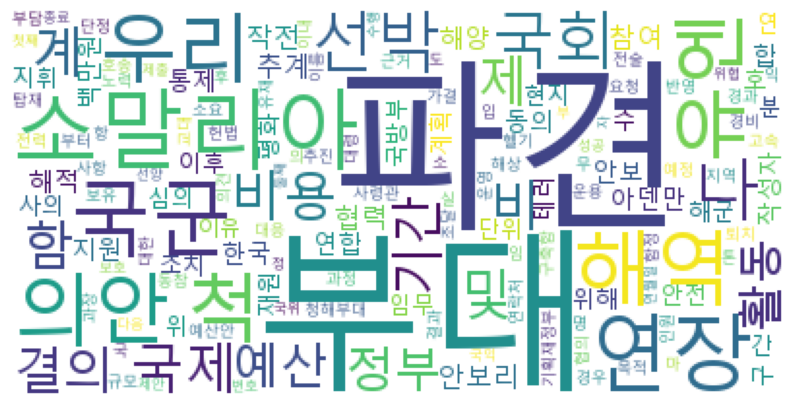

In [57]:
wordcloud=WordCloud(font_path=path,  # 워드 클라우드이 객체 생성
                   relative_scaling=0.2,  # 한글 위치 표시
                   background_color='white',
                   ).generate_from_frequencies(dict(data))
plt.figure(figsize=(10,6))  # 단어별 빈도수를 딕셔너리로 변환해서 전달
plt.imshow(wordcloud)  # 이미지 출력
plt.axis("off")  # 그래프에 대한 축을 표시하지 않는다
plt.show()

In [58]:
!pip install hgtk

Defaulting to user installation because normal site-packages is not writeable


In [59]:
import hgtk  # 한글의 자음과 모음을 분리하는 모듈 사용

In [60]:
hgtk.letter.decompose('감')  # 특정 글자를 분리하면 초성,중성,종성으로 분리

('ㄱ', 'ㅏ', 'ㅁ')

In [61]:
hgtk.letter.compose('ㄱ','ㅏ','ㅁ')  # 분리된 글자를 한 글자로 합한다

'감'

In [62]:
sample_text='''타밀어는 드라비다어족의 남부 계통, 즉 남부드라비다어파에 속하는 언어이다.
공식어로 지정된 인도의 주요 언어 중에서 타밀어와 계통적으로 가장 가까운 것은 말라얄람어인데,
9세기 무렵까지 말라얄람어는 타밀어의 방언이었다.
이 두 언어 간에는 선사 시대에 일어난 서부 방언(말라얄람어의 원형) 분열의 증거가 되는 많은 차이가 있지만,
13~14세기 무렵까지도 두 언어는 완전히 서로 다른 언어로 분리되지 않은 채였다.'''

In [63]:
s=hgtk.text.decompose(sample_text)  # 여러 문장에 대한 단어 분리

In [64]:
s[:40]

'ㅌㅏᴥㅁㅣㄹᴥㅇㅓᴥㄴㅡㄴᴥ ㄷㅡᴥㄹㅏᴥㅂㅣᴥㄷㅏᴥㅇㅓᴥㅈㅗㄱᴥㅇㅢᴥ ㄴㅏ'

In [65]:
hgtk.text.compose(s)[:40]  # 분리된 것을 하나로 합친다

'타밀어는 드라비다어족의 남부 계통, 즉 남부드라비다어파에 속하는 언어이다'

In [66]:
hgtk.checker.is_hangul('한글입니다')   # 한글 여부 확인

True

In [67]:
hgtk.checker.is_hangul('no 한글입니다')

False

In [68]:
hgtk.checker.is_hangul('it is english')

False

In [69]:
hgtk.checker.is_hanja('大韓民國')

True

In [70]:
hgtk.checker.is_hanja('大한민국')

False

In [71]:
hgtk.checker.is_hanja('대한민국')

False

In [72]:
hgtk.josa.attach('하늘',hgtk.josa.EUN_NEUN)  # 단어에 맞는 조사를 붙여볼 수 있다

'하늘은'

In [73]:
hgtk.josa.attach('바다',hgtk.josa.EUN_NEUN)

'바다는'

In [74]:
hgtk.josa.attach('하늘',hgtk.josa.I_GA)

'하늘이'

In [75]:
hgtk.josa.attach('바다',hgtk.josa.I_GA)

'바다가'

In [76]:
hgtk.josa.attach('하늘',hgtk.josa.EUL_REUL)

'하늘을'

In [77]:
hgtk.josa.attach('바다',hgtk.josa.EUL_REUL)

'바다를'

In [78]:
# https://www.crummy.com/software/BeautifulSoup/bs4/doc/
!pip install beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable


In [80]:
from bs4 import BeautifulSoup  # HTML 문서를 파싱하는 모듈 사용

In [81]:
html_doc="""
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story1">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story2">
<a href="http://example.com/tillie" class="sister" id="link4">Tillie</a>;
빈값</p>
"""

In [82]:
html_doc[:80]

'\n<html><head><title>The Dormouse\'s story</title></head>\n<body>\n<p class="title">'

In [83]:
html_doc=html_doc.replace('\n','')  # 문장 끝을 표시하는 개행무자를 빈 문자열로 변환
html_doc[:80]

'<html><head><title>The Dormouse\'s story</title></head><body><p class="title"><b>'

In [84]:
soup_=BeautifulSoup(html_doc,'html.parser')
type(soup_)

bs4.BeautifulSoup

In [85]:
soup_.text[:80]

"The Dormouse's storyThe Dormouse's storyOnce upon a time there were three little"

In [86]:
type(soup_.contents[0])

bs4.element.Tag

In [87]:
for i in soup_.contents[0].strings:
    print(i)

The Dormouse's story
The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie
,
Lacie
 and
Tillie
;and they lived at the bottom of a well.
Tillie
;빈값


In [88]:
for i in soup_.contents[0].next_elements:
    print(type(i))
    if type(i) != type(soup_.contents[0]):
        new_obj=i
        print(i)
        break

<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>
The Dormouse's story


In [89]:
type(new_obj)

bs4.element.NavigableString

In [90]:
new_obj

"The Dormouse's story"

In [91]:
tag=soup_.title

In [92]:
type(tag)

bs4.element.Tag

In [93]:
tag

<title>The Dormouse's story</title>

In [95]:
tag.name

'title'

In [96]:
tag.contents

["The Dormouse's story"]

In [97]:
tag.string

"The Dormouse's story"

In [98]:
tag.parent

<head><title>The Dormouse's story</title></head>

In [99]:
type(tag.parent)

bs4.element.Tag

In [100]:
tag.children

In [101]:
[*tag.children]

["The Dormouse's story"]

In [102]:
tag_p=soup_.p
tag_p

<p class="title"><b>The Dormouse's story</b></p>

In [103]:
type(tag_p)

bs4.element.Tag

In [104]:
[*tag_p.children]

[<b>The Dormouse's story</b>]

In [105]:
print(tag_p.next_sibling.name)

p


In [107]:
for i in tag_p.next_siblings:
    print(type(i), i.name)

<class 'bs4.element.Tag'> p
<class 'bs4.element.Tag'> p


In [108]:
fa=soup_.find("p")

In [109]:
type(fa)

bs4.element.Tag

In [110]:
fa.name

'p'

In [111]:
fa.contents

[<b>The Dormouse's story</b>]

In [112]:
fas=soup_.findAll("p",{'class':"story1"})

In [113]:
type(fas)

bs4.element.ResultSet

In [114]:
type(fas[0])

bs4.element.Tag

In [115]:
fas[0].name

'p'

In [116]:
fas[0].a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [117]:
sel_pa=soup_.select('p > a')

In [118]:
type(sel_pa)

bs4.element.ResultSet

In [119]:
type(sel_pa[0])

bs4.element.Tag

In [120]:
sel_pa

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>,
 <a class="sister" href="http://example.com/tillie" id="link4">Tillie</a>]

In [122]:
soup_.select('p.story1 > a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [123]:
fas_=soup_.findAll('p',{'class':"story2"})

In [124]:
fas_

[<p class="story2"><a class="sister" href="http://example.com/tillie" id="link4">Tillie</a>;빈값</p>]

In [125]:
type(fas_)

bs4.element.ResultSet

In [126]:
ss=soup_.select('p.story2')

In [127]:
s

[<p class="story2"><a class="sister" href="http://example.com/tillie" id="link4">Tillie</a>;빈값</p>]

In [128]:
type(ss)

bs4.element.ResultSet

In [129]:
from wordcloud import WordCloud

In [130]:
import sys

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys

from matplotlib import font_manager, rc

if sys.platform == 'darwin':
    path='/Library/Fonts/AppleGothic.ttf'
elif sys.platform == 'win32':
    path='c:/Windows/Fonts/malgun.ttf'
else:
    print('Unknow system... sorry~~~')

font_name=font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus']=False

In [136]:
wordcloud=WordCloud(font_path=path,
                    width=1600,
                    height=800)

In [142]:
text="커피 전화 전화 전화 사람 사람 고양이 커피 개 사람 전화"
wordcloud_=wordcloud.generate(text)

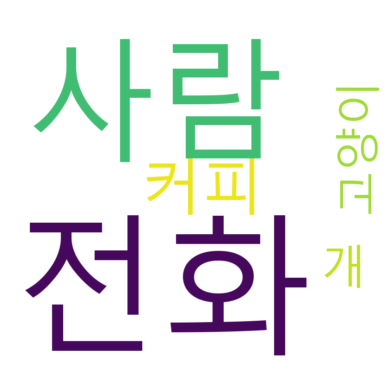

In [143]:
fig=plt.figure()
plt.imshow(wordcloud_,interpolation='bilinear')
plt.axis('off')
plt.show()

In [144]:
wordcloud=WordCloud(font_path=path,
                    background_color='white',
                    width=800,
                    height=800)

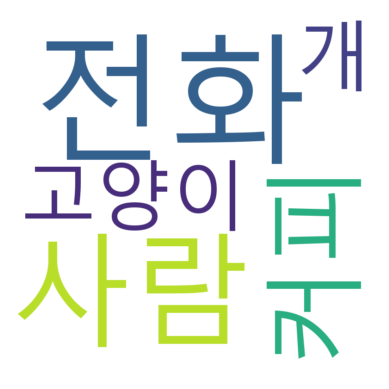

In [145]:
wordcloud=wordcloud.generate(text)
fig=plt.figure()
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

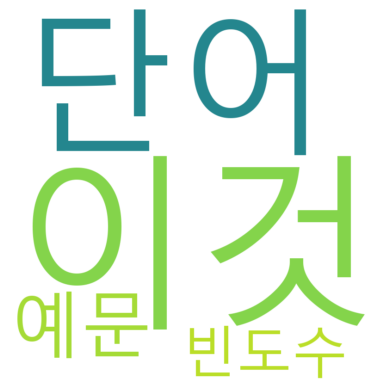

In [146]:
keywords={'이것':5,'예문':3,'단어':5,'빈도수':3}
wordcloud_=wordcloud_.generate_from_frequencies(keywords)
fig=plt.figure()
plt.imshow(wordcloud_,interpolation='bilinear')
plt.axis('off')
plt.show()

In [147]:
import numpy as np
from PIL import Image
r2d2_mask=np.array(Image.open('./datascience_basic-master/r2d2.JPG'))

In [148]:
from wordcloud import STOPWORDS

stopwords=set()
stopwords.add("은")
stopwords.add("입니다")
stopwords.add("것인가")
stopwords.add("처럼")

wordcloud=WordCloud(stopwords=stopwords,
                   font_path=path,
                   background_color='white',
                   width=800,
                   height=800,
                   mask=r2d2_mask)

In [149]:
texts=['로봇 처럼 표시하는 것을 보기 위해 이 것은 예문 입니다 가을이라 겨울 바람 솔 솔 불어오니 ',
       '여러분의 문장을 넣으세요 ㅎㅎㅎ 스타워즈 영화에 나오는 다양ㅇ한 로봇처럼']

In [150]:
wordcloud=wordcloud.generate_from_text(texts[0]+texts[1])

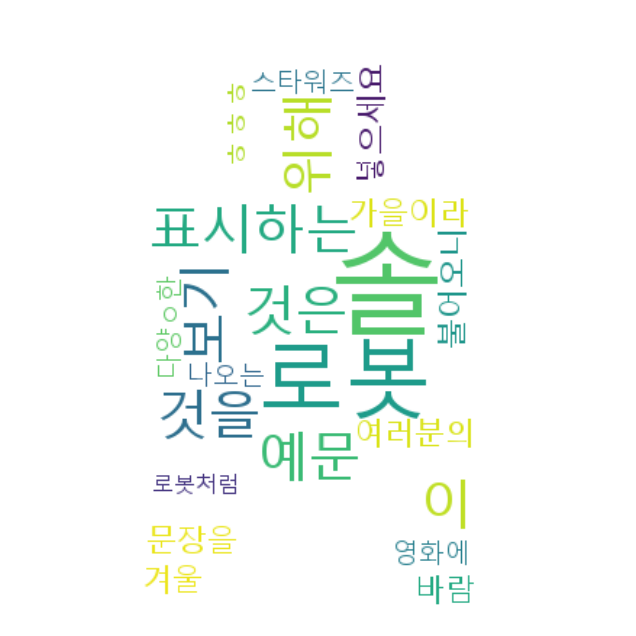

In [151]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [152]:
from bs4 import BeautifulSoup
import requests
from konlpy.tag import Okt
from collections import Counter

In [153]:
url='http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cnt&date=20240314'
response=requests.get(url)
html=response.text
print(type(html))

<class 'str'>


In [154]:
html_s=html.strip()
html_s[:100]

'<!DOCTYPE html>\n<html lang="ko">\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compat'

In [264]:
wquery="더블유게임즈"
url=f'http://kin.naver.com/search/list.nhn?query={wquery}'
req=requests.get(url)
req

<Response [200]>

In [265]:
req.text[:50]

'\n\n\n\n\n\n\n\n\n\n\n\n\t\n\t\n\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!DOCTYPE '

In [266]:
soup=BeautifulSoup(req.text, 'html.parser')

In [267]:
titles=soup.select('ul.basic1 > li > dl > dt > a')

In [268]:
len(titles)

10

In [269]:
title_list=[]

In [270]:
for title in titles:
    title_list.append(title.get_text())

In [271]:
type(title)

bs4.element.Tag

In [272]:
title.contents

['장외주식에대해서질문 ', <b>더블유게임즈</b>]

In [273]:
title_list

['더블유게임즈 주식',
 '더블유게임즈 주가 전망 좀 봐주세요.',
 '더블유게임즈 주가 어디까지 갈수... ',
 '더블유게임즈 주식 악재 어떻게... ',
 '더블유게임즈 주가 왜 갑자기 오르죠?',
 '더블유게임즈 주식 전망 및 분석',
 '더블유게임즈 주식 어디까지 가줄까요',
 '더블유게임즈 주가 오늘 급락해서... ',
 '더블유게임즈 영업이익에 비해...',
 '장외주식에대해서질문 더블유게임즈']

In [274]:
search_word="더블유게임즈"
start_num=1
title_list=[]
search=f'https://kin.naver.com/search/list.nhn?query={wquery}&start={start_num}'

In [275]:
def get_titles(search):
    
    url=search
    req=requests.get(url)
    
    if req.ok:
        html=req.text
        soup=BeautifulSoup(html, 'html.parser')
        titles=soup.select('ul.basic1 > li > dl > dt > a'
        )
        
        for title in titles:
            title_list.append(title.get_text())

In [276]:
title_list_=[]

In [277]:
def get_titles_(start_num, end_num, search):
    
    while True:
        if start_num > end_num:
            break
    
    url=search
    req=requests.get(url)
    
    if req.ok:
        html=req.text
        soup=BeautifulSoup(html, 'html.parser')
        titles=soup.select('ul.basic1 > li > dl > dt > a'
        )
        
        for title in titles:
            title_list.append(title.get_text())
    start_num+=10

In [278]:
def make_word(word_count):
    twitter=Okt()
    
    sentences_tag=[]
    for sentence in title_list:
        morph=twitter.pos(sentence)
        sentences_tag.append(morph)
        
    noun_adj_list=[]
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective']:
                noun_adj_list.append(word)
    
    counts=Counter(noun_adj_list)
    tags=counts.most_common(word_count)
    
    return tags

In [279]:
def draw_wordcloud(tags):
    wc=WordCloud(font_path=path,
                 mask=r2d2_mask,
                 background_color='white',
                width=800,
                height=600,)
    cloud=wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10,8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

In [280]:
get_titles(search)

In [281]:
title_list

['더블유게임즈 주식',
 '더블유게임즈 주가 전망 좀 봐주세요.',
 '더블유게임즈 주가 어디까지 갈수... ',
 '더블유게임즈 주식 악재 어떻게... ',
 '더블유게임즈 주가 왜 갑자기 오르죠?',
 '더블유게임즈 주식 전망 및 분석',
 '더블유게임즈 주식 어디까지 가줄까요',
 '더블유게임즈 주가 오늘 급락해서... ',
 '더블유게임즈 영업이익에 비해...',
 '장외주식에대해서질문 더블유게임즈']

In [282]:
import warnings
warnings.filterwarnings(action='ignore')
tags=make_word(50)

In [283]:
tags[:5]

[('더블유', 10), ('게임', 10), ('주식', 5), ('주가', 4), ('전망', 2)]

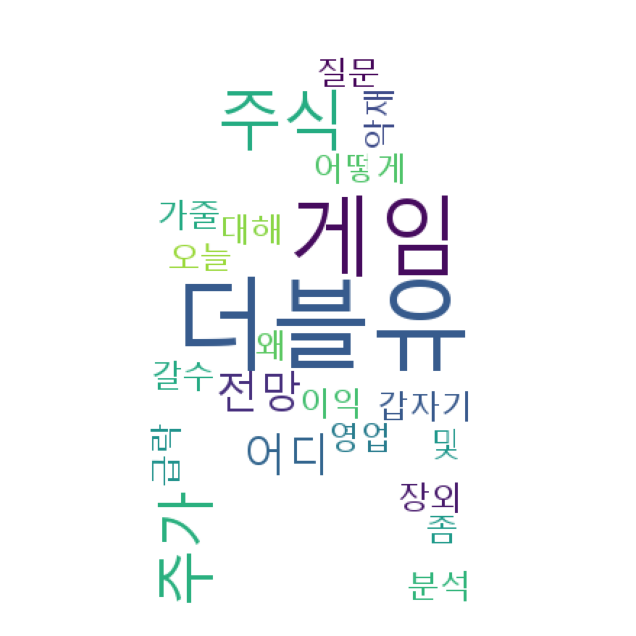

In [284]:
draw_wordcloud(tags)